<a href="https://colab.research.google.com/github/noahgift/food/blob/master/world_food_facts_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Food Facts

* Original Data Source:  https://www.kaggle.com/openfoodfacts/world-food-facts
* Modified Source:  https://www.kaggle.com/lwodarzek/nutrition-table-clustering/output

### Ingest

In [0]:
import pandas as pd

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/noahgift/food/master/data/features.en.openfoodfacts.org.products.csv")
df.drop(["Unnamed: 0", "exceeded", "g_sum", "energy_100g"], axis=1, inplace=True) #drop two rows we don't need
df = df.drop(df.index[[1,11877]]) #drop outlier
df.rename(index=str, columns={"reconstructed_energy": "energy_100g"}, inplace=True)
df.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
0,28.57,64.29,14.29,3.57,0.00000,2267.85,Banana Chips Sweetened (Whole)
2,57.14,17.86,3.57,17.86,1.22428,2835.70,Organic Salted Nut Mix
3,18.75,57.81,15.62,14.06,0.13970,1953.04,Organic Muesli
4,36.67,36.67,3.33,16.67,1.60782,2336.91,Zen Party Mix
5,18.18,60.00,21.82,14.55,0.02286,1976.37,Cinnamon Nut Granola


### EDA

In [0]:
df.columns

Index(['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'energy_100g', 'product'],
      dtype='object')

Rows and Attributes

In [0]:
df.shape

(45026, 7)

First 10 Columns

## Sorting

### Sort by One Column:  Protein

In [0]:
df.sort_values(by=["proteins_100g"], ascending=False).head(10)

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
2377,0.00,0.00,0.00,100.00,0.00000,1700.00,Unflavored Gelatin
37027,0.00,0.00,0.00,100.00,0.36322,1700.00,Unflavored Gelatin
16674,6.82,22.73,13.64,86.36,14.77772,2120.51,"Fisherman's Wharf, Cocktail Shrimp"
37415,3.33,6.67,3.33,83.33,0.67818,1659.87,"Whey & Soy Protein, Flavored Drink Mix, Vanilla"
133,4.60,8.80,6.00,78.05,1.21158,1655.85,Whey Protein aus Molke 500 Gramm Vanilla
131,4.60,8.80,6.00,78.05,1.21158,1655.85,Whey Protein aus Molke 1000 Gramm Vanilla
129,4.60,8.80,6.00,78.05,1.21158,1655.85,Whey Protein aus Molke Vanilla
33115,1.67,13.33,0.00,76.67,0.00000,1595.13,Vital Wheat
37392,6.25,8.33,4.17,75.00,0.63500,1660.36,"Whey Protein Powder, Chocolate"
16669,5.36,21.43,14.29,67.86,12.79144,1726.97,"Fisherman's Wharf, Cocktail Shrimp"


### Sort by Two Columns:  Sugar, Salt

In [0]:
df.sort_values(by=["sugars_100g", "salt_100g"], ascending=[False, False]).head(10)

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,product
33151,0.0,0.0,100.0,0.0,71.1200,0.0,"Turkey Brine Kit, Garlic & Herb"
24783,0.0,100.0,100.0,0.0,24.1300,1700.0,Seasoning
4073,0.0,100.0,100.0,0.0,7.6200,1700.0,"Seasoning Rub, Sweet & Spicy Seafood"
10282,0.0,100.0,100.0,0.0,2.5400,1700.0,Instant Pectin
17880,0.0,100.0,100.0,0.0,0.6350,1700.0,Cranberry Cosmos Cocktail Rimming Sugar
8822,0.0,100.0,100.0,0.0,0.5588,1700.0,"Alaga, The Original Cane Flavor Syrup, Cane"
8823,0.0,100.0,100.0,0.0,0.5588,1700.0,The Original Cane Syrup
41157,0.0,100.0,100.0,0.0,0.3175,1700.0,Panela Brown Sugar Cane
41158,0.0,100.0,100.0,0.0,0.3175,1700.0,Panela Brown Sugar Cane
41159,0.0,100.0,100.0,0.0,0.3175,1700.0,Panela


## Visualizations

### Histogram

Generate distributions based on energy type

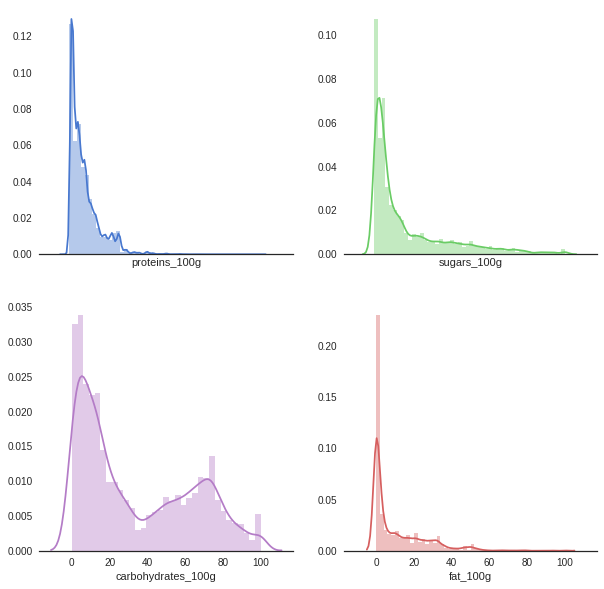

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
sns.set(style="white", palette="muted", color_codes=True)


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df.proteins_100g, color="b", ax=axes[0, 0])
sns.distplot(df.sugars_100g, color="g", ax=axes[0, 1])
sns.distplot(df.fat_100g, color="r", ax=axes[1, 1])
sns.distplot(df.carbohydrates_100g, color="m", ax=axes[1, 0])

### Word Cloud

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#### High protein foods

Find protein foods in the 98th percentile

In [0]:
high_protein_df = df[df.proteins_100g > df.proteins_100g.quantile(.98)]
high_protein_text = high_protein_df['product'].values
len(high_protein_text)

896

Word Cloud High Protein

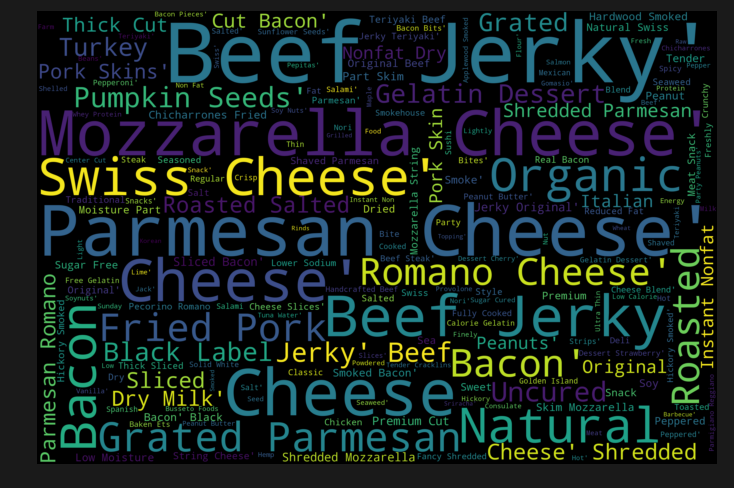

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(high_protein_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### High fat foods

Find fatty foods in the 98th percentile

In [0]:
high_fat_df = df[df.fat_100g > df.fat_100g.quantile(.98)]
high_fat_text = high_fat_df['product'].values
len(high_fat_text)

878

Word Cloud High Fat

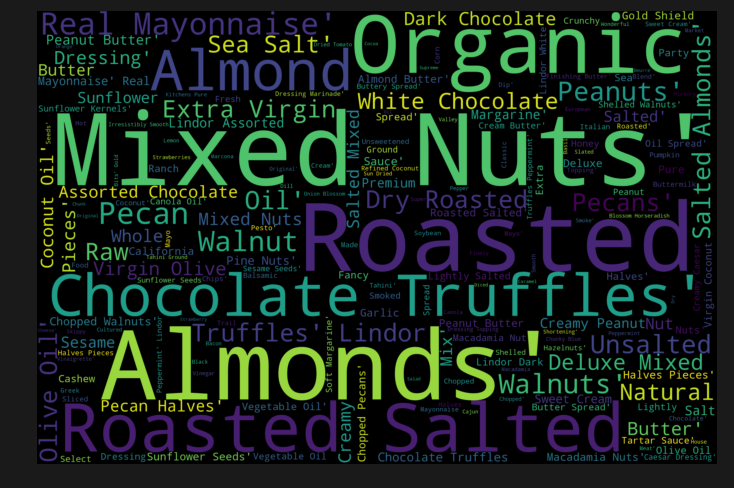

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(high_fat_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### High sugar foods

Find sugary foods in the 98th percentile

In [0]:
high_sugar_df = df[df.sugars_100g > df.sugars_100g.quantile(.98)]
high_sugar_text = high_sugar_df['product'].values
len(high_sugar_text)

893

Word Cloud High Sugar

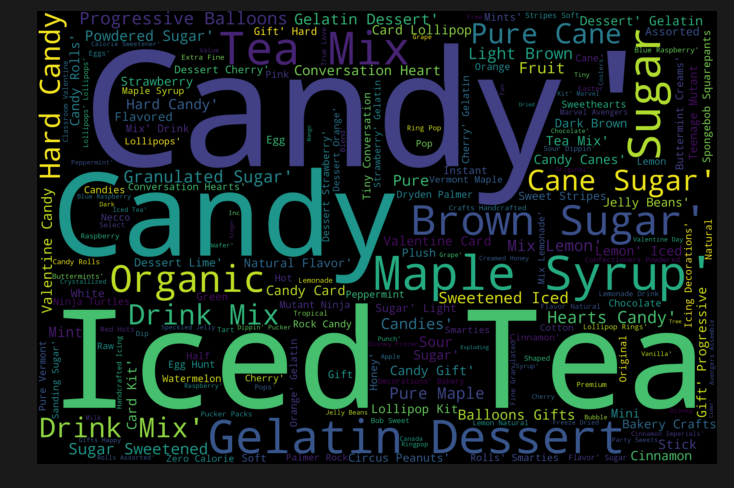

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(high_sugar_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Topic Modeling 

### Gensim example

Preprocess Text

In [0]:
dataset = df['product'].fillna("").values
raw_text_data = [d.split() for d in dataset]

Setup Stop Words

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Remove stop words


In [0]:
text_data = [item for item in raw_text_data if item not in stop]

In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [25]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.085*"Cheese" + 0.037*"Milk" + 0.031*"Chocolate" + 0.022*"Cheddar"')
(1, '0.042*"Sauce" + 0.033*"In" + 0.024*"Light" + 0.019*"Sliced"')
(2, '0.043*"Cream" + 0.040*"Beans" + 0.025*"Ice" + 0.025*"Dressing"')
(3, '0.040*"Candy" + 0.024*"Mix" + 0.024*"Whole" + 0.016*"Macaroni"')
(4, '0.048*"&" + 0.025*"Sweet" + 0.024*"With" + 0.022*"Butter"')


## Clustering

In [26]:
df.columns

Index(['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'energy_100g', 'product'],
      dtype='object')

Create Features to Cluster

In [0]:
df_cluster_features = df.drop("product", axis=1)

Scale the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df_cluster_features))
print(scaler.transform(df_cluster_features))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[2.85700000e-01 6.42900000e-01 1.53063241e-01 6.89388819e-02
  0.00000000e+00 5.06782123e-01]
 [5.71400000e-01 1.78600000e-01 4.71343874e-02 2.06913199e-01
  6.02500000e-04 6.33675978e-01]
 [1.87500000e-01 5.78100000e-01 1.66205534e-01 1.70223038e-01
  6.87500000e-05 4.36433520e-01]
 ...
 [0.00000000e+00 1.33300000e-01 1.43577075e-01 3.44694410e-02
  1.87500000e-05 5.06391061e-02]
 [0.00000000e+00 1.62500000e-01 1.72430830e-01 3.44694410e-02
  1.87500000e-05 6.17318436e-02]
 [0.00000000e+00 0.00000000e+00 1.18577075e-02 3.44694410e-02
  0.00000000e+00 0.00000000e+00]]


#### Cluster Diagnostics

##### Elbow Plot

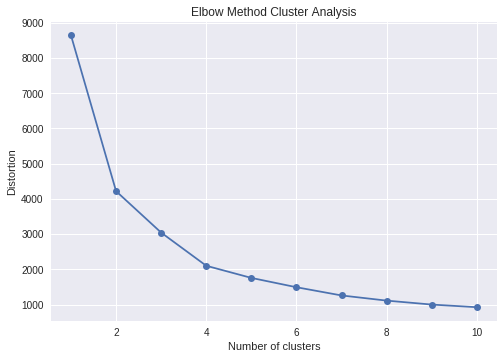

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(df_cluster_features))
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Elbow Method Cluster Analysis")
plt.show()

##### Silhouette Plot

In [0]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(scaler.transform(df_cluster_features))

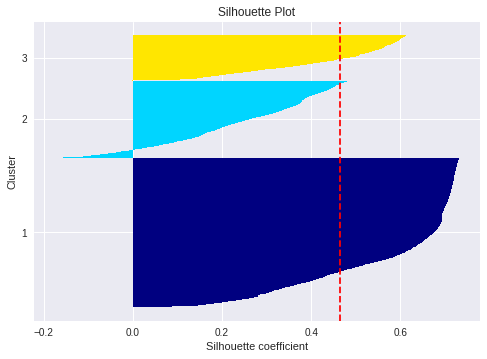

<Figure size 1440x720 with 0 Axes>

In [34]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(df_cluster_features),
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot')
plt.figure(figsize=(20,10))
plt.show()

##### Yellowbrick Visualizer Elbow Method

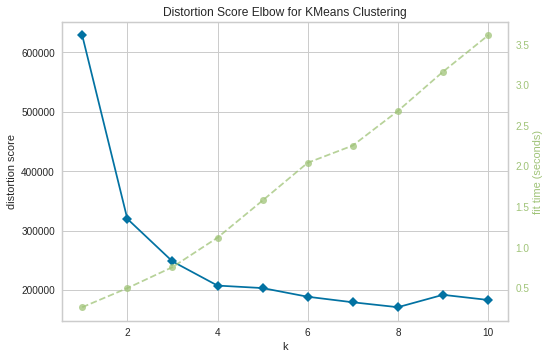

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df_cluster_features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

##### Yellowbrick Silhouette Visualizer


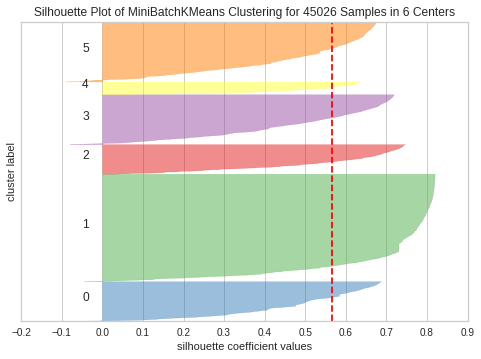

In [36]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_cluster_features) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data